In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
dataset = pd.read_csv('Bank_Data.csv')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
dataset.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [5]:
dataset.isnull().sum()
(dataset.isnull().sum()/(len(dataset)))*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


# __Principal Findings:__<br>
## Based on the analysis, here are some key findings:<br>
1. The dataset has a binary classification task with the target variable 'Y,' which indicates whether a client subscribed to a term deposit ('yes' or 'no').
2. The distribution of the target variable shows class imbalance, with more 'no' subscriptions compared to 'yes' subscriptions.
3. Categorical variables such as 'Job,' 'Marital,' and 'Education' provide insights into the demographics of the clients.
Decision Tree and Naive Bayes classifiers have been trained and evaluated for predicting subscription outcomes.


In [22]:
cat_cols=dataset.select_dtypes(include=['object']).columns
num_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Numerical Variables:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


age
Skew : 0.7


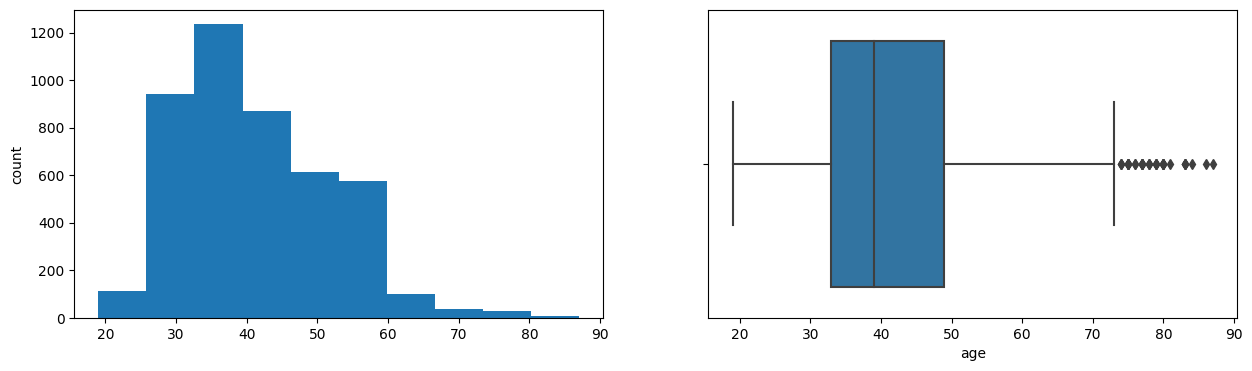

balance
Skew : 6.6
left skewed


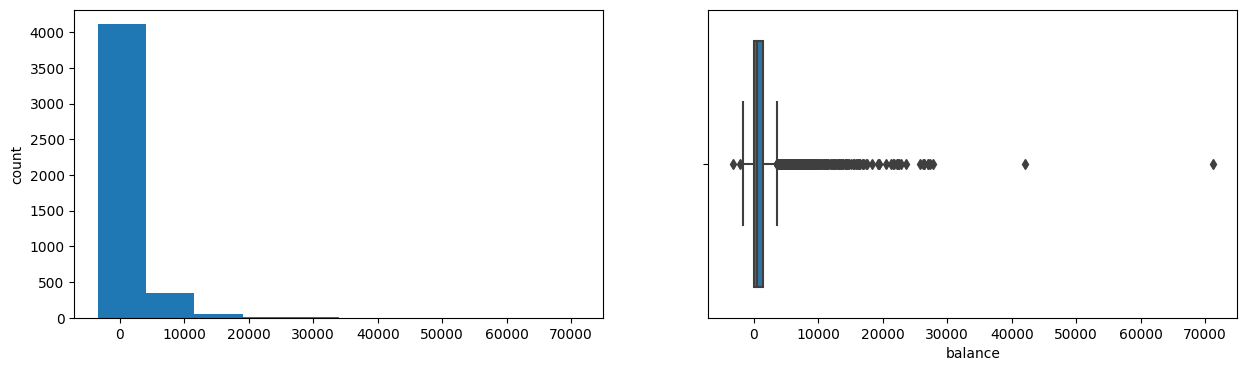

day
Skew : 0.09


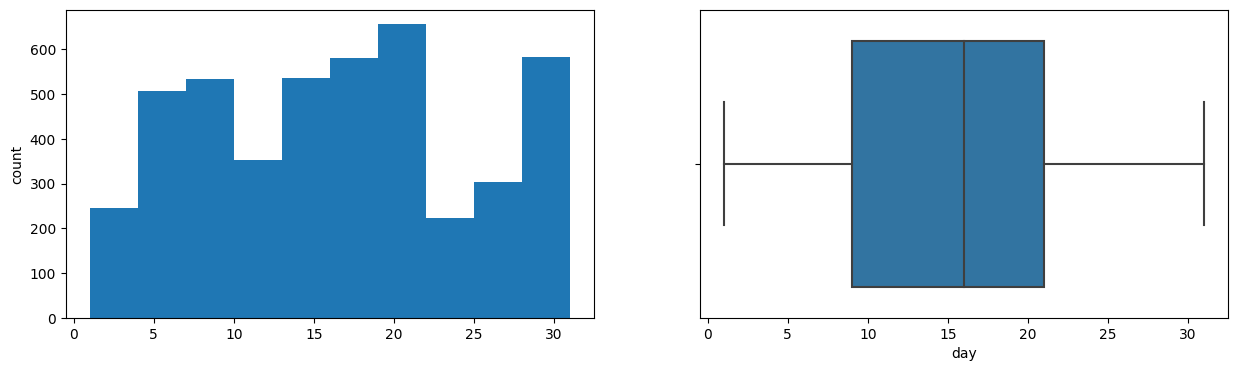

duration
Skew : 2.77
left skewed


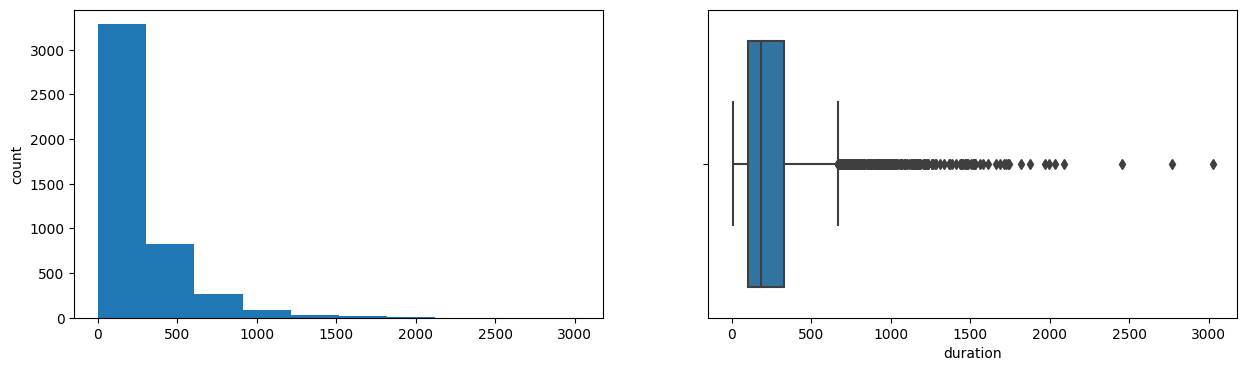

campaign
Skew : 4.74
left skewed


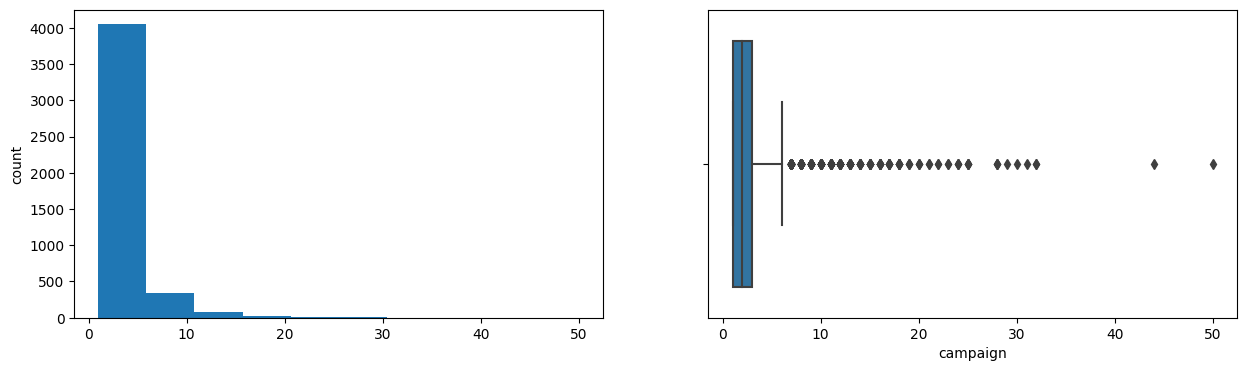

pdays
Skew : 2.72
left skewed


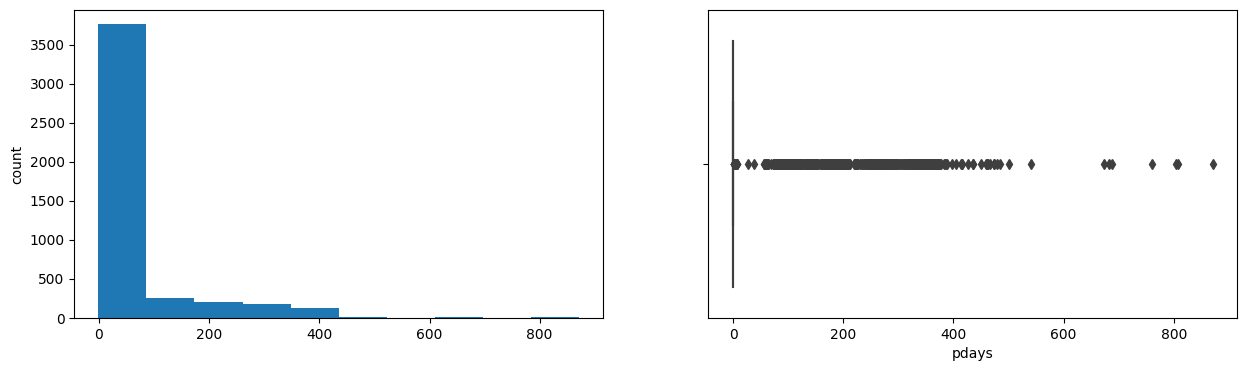

previous
Skew : 5.88
left skewed


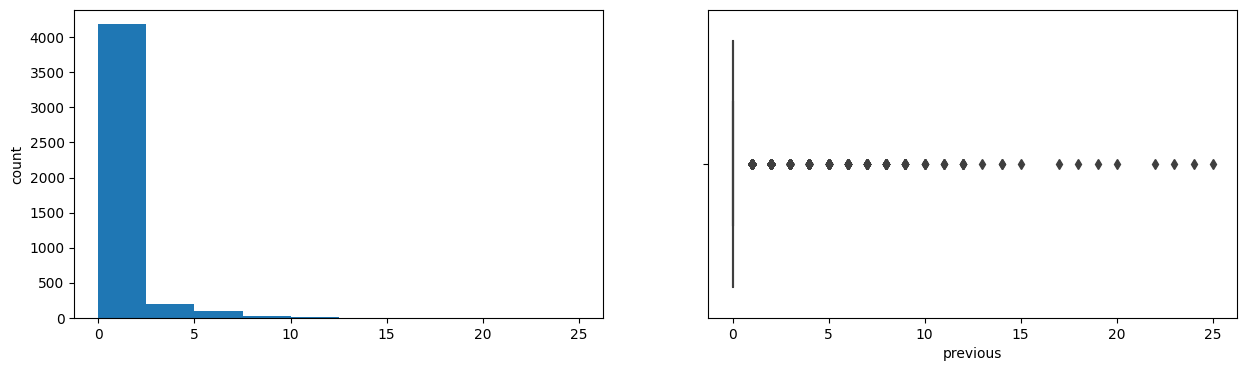

In [26]:
left_skewed = []
for col in num_cols:
    print(col)
    print('Skew :', round(dataset[col].skew(), 2))
    if round(dataset[col].skew(), 2) > 1:
        print("left skewed")
        left_skewed.append(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    dataset[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset[col])
    plt.show()

# Here are other findings about skewness:

1. Most of the numerical columns are left skewed and that means most of the data are present into the left portion of the dataset and there are outliers or tails on the right portions
2. The left skewed features should be log transformed for betterments and the right skewed features should be square rooted
3. As there are many NaN and Infinity values come after log transformation so it has not been implemented this time


In [33]:
# dataset[left_skewed] = dataset[left_skewed].apply(lambda x : np.log(x))

In [37]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


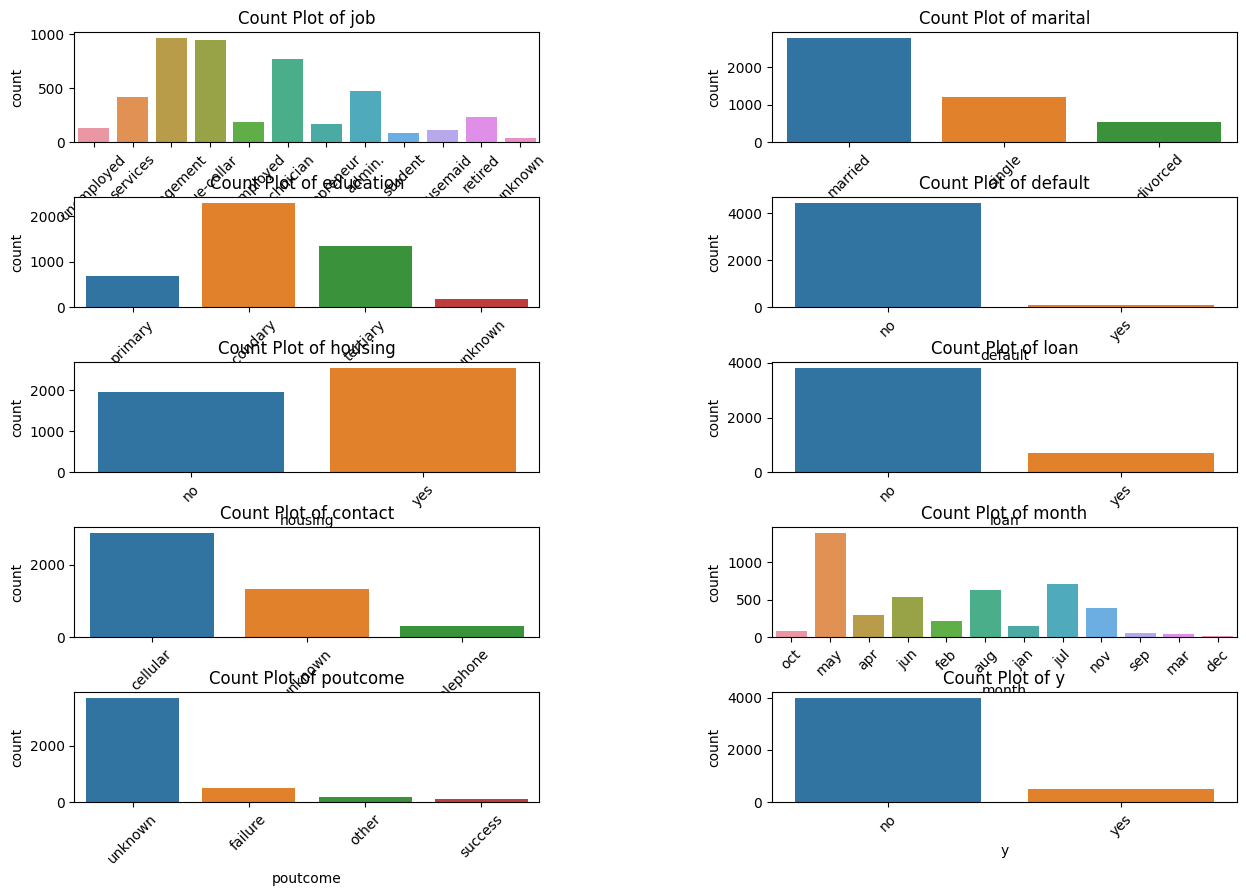

In [17]:
# Set the number of columns for subplots
num_cols = 2
num_rows = (len(cat_cols) + 1) // num_cols

# Create subplots to display count plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(wspace=0.5, hspace=.5)

# Loop through the categorical columns and create count plots
for i, column in enumerate(cat_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(data=dataset, x=column, ax=ax)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Remove empty subplots (if any)
if len(cat_cols) < num_rows * num_cols:
    for i in range(len(cat_cols), num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

plt.show()

# Here are the findings about the categorical features:

1. The barcharts show that there are no ordinality in the data so these should be encoded with one hot encoding instead of label encoding
2. Most of the categorical features contain only 2 or 3 unique values and only two features named 'job' and 'month' contain 12 each. But there are no ordinality in themselves and so these should also be nominal in types. So I have encoded this with onehotencoding also
3. The target column is not balanced as there are too many negatives than the positives

In [46]:
#convert categorical columns to numeric columns
dataset = pd.get_dummies(dataset, columns=cat_cols, drop_first=True)


In [47]:
dataset.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [48]:


# Split the data into features (X) and the target (Y)
X = dataset.drop('y_yes', axis=1)
Y = dataset['y_yes']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
model_filename = "decision_tree.pkl"
joblib.dump(dt_classifier, model_filename)

# Make predictions
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(Y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8806629834254144


In [52]:
from sklearn.naive_bayes import GaussianNB

# Create and train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)
model_filename = "naive_bias.pkl"
joblib.dump(nb_classifier, model_filename)

# Make predictions
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(Y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8419889502762431


In [81]:
new_dataset = dataset.copy()

for column in new_dataset.columns:
    new_dataset[column] = False

new_dataset = new_dataset.head(1)
new_dataset.to_csv("column_names.csv",index=False)


### Here The Decision Tree Classifier performs better than the Naive Bias Classifier

***

# Recommendations:
## To enhance the telemarketing strategy, consider the following recommendations:
1. Balancing the Dataset: Address class imbalance by using techniques like oversampling the minority class or changing the decision threshold for class prediction.
2. Feature Importance: Analyze the importance of features in the Decision Tree model to understand which factors are influential in predicting term deposit subscriptions.
3. Further Analysis: Explore other machine learning algorithms and techniques, including ensemble methods like Random Forest and model hyperparameter tuning, to improve prediction accuracy.
4. Customer Segmentation: Segment the customer base based on demographics, behavior, or previous campaign results to tailor marketing strategies for different groups.
5. Optimize Contact Strategy: Analyze the 'Contact' method and 'Campaign' duration to determine the most effective ways to engage with clients.
6. Follow-Up Campaigns: Use insights from 'Pdays' and 'Previous' to plan follow-up campaigns strategically for clients who were not previously contacted or had prior interactions.
7. Data Collection and Storage: Maintain data hygiene, improve data collection methods, and set up a data storage system for storing campaign history and client interactions.
8. Continuous Monitoring: Implement continuous monitoring and periodic reevaluation of the marketing strategy to adapt to changing customer behavior and market trends.

These recommendations can help the bank refine its telemarketing strategy and improve the success of its long-term deposit account promotion efforts.
